In [63]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import xlrd
pd.options.display.max_rows = 50
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline


In [64]:
df = pd.read_excel('ForeignGifts.xls',encoding = 'latin-1', header = 1)

In [65]:
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,324200,Carnegie Mellon University,Pittsburgh,PA,2015-01-01,77391377,Contract,QATAR,Qatar Foundation for Education
1,2,143400,American University (The),Washington,DC,2012-01-25,500000,Monetary Gift,BAHRAIN,Kingdom of Bahrain
2,3,143400,American University (The),Washington,DC,2013-05-28,500000,Monetary Gift,BAHRAIN,Sheikh Salman Bin Al-Khalifa
3,4,143400,American University (The),Washington,DC,2015-09-10,500000,Monetary Gift,KUWAIT,NaN
4,5,143400,American University (The),Washington,DC,2012-05-17,610000,Monetary Gift,ENGLAND,NaN


In [66]:
df.shape

(21052, 10)

In [67]:
df.dtypes

ID                                     int64
OPEID                                  int64
Institution Name                      object
City                                  object
State                                 object
Foreign Gift Received Date    datetime64[ns]
Foreign Gift Amount                    int64
Gift Type                             object
Country of Giftor                     object
Giftor Name                           object
dtype: object

In [68]:
df2= df[df['Gift Type'] != 'Contract']

In [69]:
df.groupby(by='Institution Name',as_index = False).sum().sort_values(by='Foreign Gift Amount',ascending = False)

,Institution Name,ID,OPEID,Foreign Gift Amount
15,Carnegie Mellon University,685918,52844600,1378003807
35,Harvard University,2244942,121542000,1143899998
50,Massachusetts Institute of Technology,3315753,90387000,660830374
42,Johns Hopkins University,9778790,245293700,447459034
63,Northwestern University,1773051,39997000,420550173
31,Georgetown University,439448,14883500,415622195
92,"University of California, Berkeley",3383831,42246400,336801721
25,Duke University,421232,32412000,314693237
83,Stanford University,7469064,85999500,313775195
62,New York University,1625636,74081000,291391003


In [70]:
df.groupby(by='Country of Giftor', as_index = False).sum().sort_values(by='Foreign Gift Amount',ascending = False)

,Country of Giftor,ID,OPEID,Foreign Gift Amount
106,QATAR,3315093,118552000,1478676069
38,ENGLAND,31589478,552868700,936468499
13,BERMUDA,926520,23718000,812426114
26,CHINA,18092303,315381600,680273016
110,SAUDI ARABIA,6245636,141787300,649971586
53,HONG KONG,10044775,153988300,583104614
22,CANADA,23516436,377770600,511016461
65,JAPAN,20199569,337935500,447932424
56,INDIA,2366358,121098700,428598388
123,SWITZERLAND,14075862,338162400,421080365


In [71]:
df.groupby(by= ['Country of Giftor','Gift Type'],
           as_index = False).sum().sort_values(by='Foreign Gift Amount', ascending = False)

,Country of Giftor,Gift Type,ID,OPEID,Foreign Gift Amount
178,QATAR,Contract,2648866,88956600,1404054808
21,BERMUDA,Contract,554687,14465400,755534237
65,ENGLAND,Monetary Gift,19538295,263532100,544642697
92,HONG KONG,Monetary Gift,9670309,146498900,531604426
185,SAUDI ARABIA,Contract,5064171,114011400,455410417
64,ENGLAND,Contract,12051183,289336600,391825802
43,CHINA,Contract,5868422,125816800,356598240
44,CHINA,Monetary Gift,12223881,189564800,323674776
111,JAPAN,Contract,8392023,173995300,273270229
35,CANADA,Contract,8925421,186960900,256781569


In [72]:
contract = df[df['Gift Type'] == 'Contract'].groupby(by='Country of Giftor', as_index = False).sum()

In [73]:
contract = contract.drop(columns=['ID', 'OPEID'])

In [74]:
contract

,Country of Giftor,Foreign Gift Amount
0,AFGHANISTAN,5001410
1,ANGOLA,499908
2,ARGENTINA,1490733
3,AUSTRALIA,37268805
4,AUSTRIA,15553197
5,BAHAMAS,24754452
6,BAHRAIN,3161970
7,BANGLADESH,3237250
8,BELGIUM,25982853
9,BERMUDA,755534237


In [75]:
monetary_gift = df[df['Gift Type'] == 'Monetary Gift'].groupby(by='Country of Giftor', as_index = False).sum()


In [76]:
monetary_gift = monetary_gift.drop(columns=['ID', 'OPEID'])

In [77]:
monetary_gift

,Country of Giftor,Foreign Gift Amount
0,AFGHANISTAN,3890364
1,ARGENTINA,3965425
2,ARMENIA,300
3,AUSTRALIA,24187528
4,AUSTRIA,3772945
5,AZERBAIJAN,22516
6,BAHAMAS,28282017
7,BAHRAIN,1000000
8,BANGLADESH,4712443
9,BARBADOS,100


In [78]:
real_estate = df[df['Gift Type'] == 'Real Estate'].groupby(by='Country of Giftor', as_index = False).sum()

In [79]:
real_estate = real_estate.drop(columns=['ID', 'OPEID'])

In [83]:
df2 = pd.merge(contract, monetary_gift, on='Country of Giftor', how='outer')

In [85]:
df2 = pd.merge(df2, real_estate, on='Country of Giftor', how='outer')

In [86]:
df2.rename(columns={'Foreign Gift Amount_x':'contract',
                    'Foreign Gift Amount_y':'monetary_gift',
                  'Foreign Gift Amount': 'real_estate' }, inplace=True)

In [87]:
df2

,Country of Giftor,contract,monetary_gift,real_estate
0,AFGHANISTAN,5001410.0,3890364.0,NaN
1,ANGOLA,499908.0,NaN,NaN
2,ARGENTINA,1490733.0,3965425.0,NaN
3,AUSTRALIA,37268805.0,24187528.0,NaN
4,AUSTRIA,15553197.0,3772945.0,NaN
5,BAHAMAS,24754452.0,28282017.0,NaN
6,BAHRAIN,3161970.0,1000000.0,NaN
7,BANGLADESH,3237250.0,4712443.0,NaN
8,BELGIUM,25982853.0,24879544.0,NaN
9,BERMUDA,755534237.0,56891877.0,NaN


/Users/humeralodhi/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


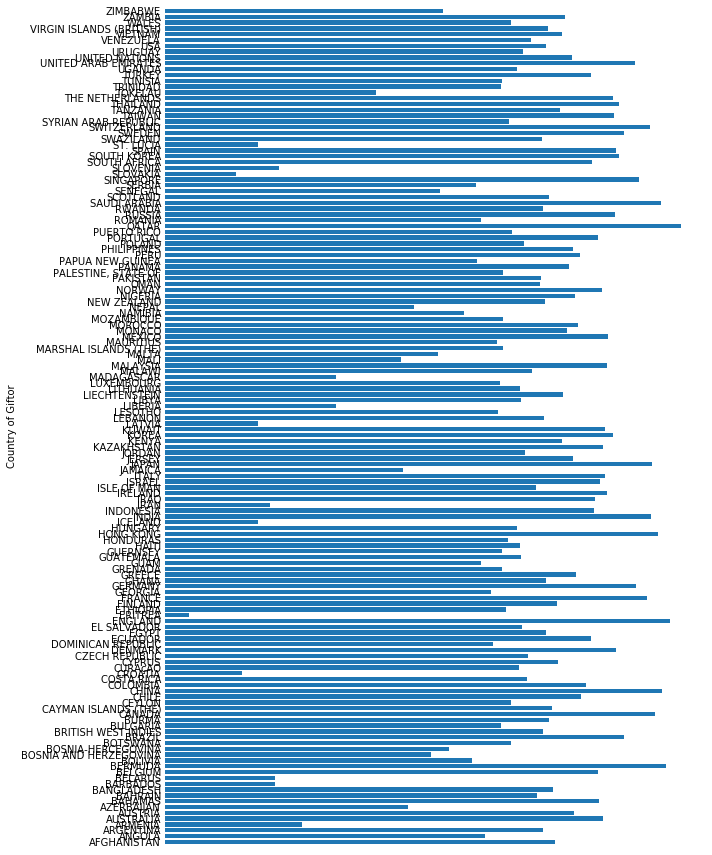

In [13]:
df.groupby(by='Country of Giftor',
           as_index = False).sum().plot(x='Country of Giftor',
                                                y =[''] 
                                                kind= 'barh',
                                                figsize=(10,12),
                                                legend = None,
                                                width = .75, stacked= True
                                                )
plt.xscale('log')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
ax1.tick_params(axis=u'both', which=u'both',length=0)
x_axis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('university.pdf')

In [21]:
df_qatar = df[(df['Country of Giftor'] == 'QATAR')].sort_values(by='Foreign Gift Amount',ascending = False)

In [22]:
df[(df['Country of Giftor'] == 'QATAR')].groupby(by='Giftor Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Foreign Gift Amount
Giftor Name,,,
Qatar Foundation,1463813,58709800,968889152
Qatar Foundation for Education,17146,1296800,299783429
Qatar National Research Fund,734209,28452500,76899012
Qatar,13847,1089600,19752354
Qatar University,123500,3132000,7480419
Qatar National Research,16848,1945200,4573226
Jasoor Institute,11631,433500,4514402
Embassy of the State of Qatar,12026,610000,2682762
Hamad Medical Corporation,36032,1049600,2265779


In [23]:
df2 = df[(df['Country of Giftor'] == 'QATAR')].groupby(by='Institution Name', as_index = False).sum().sort_values(by='Foreign Gift Amount',ascending = False)

In [24]:
df2.head()

,Institution Name,ID,OPEID,Foreign Gift Amount
1,Carnegie Mellon University,61434,7132400,376325840
5,Georgetown University,50341,3468000,350874324
11,Northwestern University,495681,9738400,340244432
16,Texas A&M University,1328192,57385600,274710107
2,Cornell University,359498,20332500,65780453


/Users/humeralodhi/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


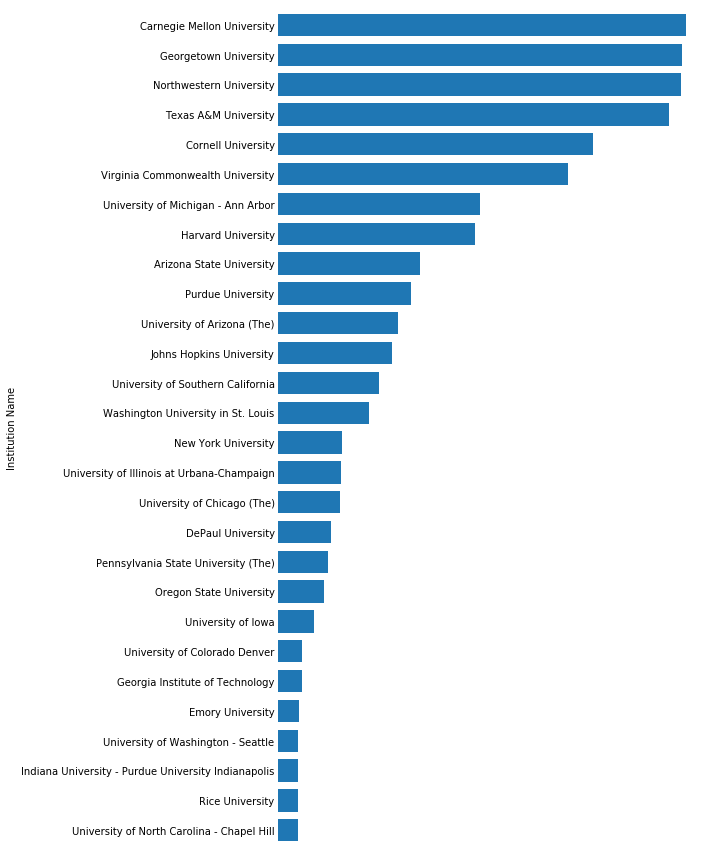

In [36]:
df2.sort_values(by='Foreign Gift Amount').plot(x='Institution Name',
                                                y ='Foreign Gift Amount', 
                                                kind= 'barh',
                                                figsize=(10,12),
                                                legend = None,
                                                width = .75, stacked= True
                                                )
plt.xscale('log')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
ax1.tick_params(axis=u'both', which=u'both',length=0)
x_axis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('university.pdf')


In [26]:
df2.columns

Index(['Institution Name', 'ID', 'OPEID', 'Foreign Gift Amount'], dtype='object')

In [27]:
df2.shape

(28, 4)

In [28]:
df2

,Institution Name,ID,OPEID,Foreign Gift Amount
1,Carnegie Mellon University,61434,7132400,376325840
5,Georgetown University,50341,3468000,350874324
11,Northwestern University,495681,9738400,340244432
16,Texas A&M University,1328192,57385600,274710107
2,Cornell University,359498,20332500,65780453
26,Virginia Commonwealth University,76978,2614500,40668808
22,University of Michigan - Ann Arbor,204259,3022500,7860694
7,Harvard University,27794,1293000,7077754
0,Arizona State University,410604,4324000,2515184
14,Purdue University,55358,1277500,2112466


In [29]:
df.groupby(by='Country of Giftor').sum().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Foreign Gift Amount
Country of Giftor,,,
QATAR,3315093,118552000,1478676069
ENGLAND,31589478,552868700,936468499
BERMUDA,926520,23718000,812426114
CHINA,18092303,315381600,680273016
SAUDI ARABIA,6245636,141787300,649971586
HONG KONG,10044775,153988300,583104614
CANADA,23516436,377770600,511016461
JAPAN,20199569,337935500,447932424
INDIA,2366358,121098700,428598388


In [30]:
df.drop(columns = ['ID', 'OPEID'])

,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,Carnegie Mellon University,Pittsburgh,PA,2015-01-01,77391377,Contract,QATAR,Qatar Foundation for Education
1,American University (The),Washington,DC,2012-01-25,500000,Monetary Gift,BAHRAIN,Kingdom of Bahrain
2,American University (The),Washington,DC,2013-05-28,500000,Monetary Gift,BAHRAIN,Sheikh Salman Bin Al-Khalifa
3,American University (The),Washington,DC,2015-09-10,500000,Monetary Gift,KUWAIT,NaN
4,American University (The),Washington,DC,2012-05-17,610000,Monetary Gift,ENGLAND,NaN
5,American University (The),Washington,DC,2014-04-24,1000000,Monetary Gift,ENGLAND,Anonymous
6,American University (The),Washington,DC,2015-04-13,1000000,Monetary Gift,ENGLAND,NaN
7,Amherst College,Amherst,MA,2018-04-05,500000,Monetary Gift,MONACO,Prince Albert II
8,Arizona State University,Tempe,AZ,2013-03-22,23,Contract,FRANCE,Center Hospitalier Univers. Vaudois
9,Arizona State University,Tempe,AZ,2018-03-28,130,Contract,VIETNAM,"Intel Products Vietnam Co., Ltd."


In [31]:
df = df.groupby(by='Country of Giftor').sum().sort_values(by='Foreign Gift Amount',ascending = False)

In [32]:
df.head()

,ID,OPEID,Foreign Gift Amount
Country of Giftor,,,
QATAR,3315093,118552000,1478676069
ENGLAND,31589478,552868700,936468499
BERMUDA,926520,23718000,812426114
CHINA,18092303,315381600,680273016
SAUDI ARABIA,6245636,141787300,649971586


In [33]:
df.drop(columns = ['ID','OPEID'])

,Foreign Gift Amount
Country of Giftor,
QATAR,1478676069
ENGLAND,936468499
BERMUDA,812426114
CHINA,680273016
SAUDI ARABIA,649971586
HONG KONG,583104614
CANADA,511016461
JAPAN,447932424
INDIA,428598388


In [34]:
df.head()

,ID,OPEID,Foreign Gift Amount
Country of Giftor,,,
QATAR,3315093,118552000,1478676069
ENGLAND,31589478,552868700,936468499
BERMUDA,926520,23718000,812426114
CHINA,18092303,315381600,680273016
SAUDI ARABIA,6245636,141787300,649971586


In [35]:
df.to_csv('foreign_gift_data.csv', index = False)